In [2]:
from nilm_analyzer.loaders import UKDALE_Loader
import csv
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
house = [1,2, 5]
app = 'dishwasher'

In [22]:
ukdale_data = UKDALE_Loader(data_path=r'C:\Users\44749\NILM\nilm_analyzer_EM401\UKDALE')

Fetching the meter_appliance mapping from UKDALE metadata: C:\Users\44749\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nilm_analyzer\metadata\ukdale

Loading specified buildings: [1, 2, 3, 4, 5]
Dataset successfully loaded!


In [23]:
appliance_data = ukdale_data.get_appliance_data(appliance='{}'.format(app), houses= house)

Loading data for appliance DISHWASHER ...
Fetching DISHWASHER data for House 1
Appliance 'DISHWASHER' does not exist in house 2.
Fetching DISHWASHER data for House 5


In [6]:
appliance_data.resample(sampling_period= 6)

Resampling for house number:  5
sampling_period = 6s, window_limit = 30 samples, fill_value = 0.0



Updating data with resampled dataset...


In [7]:
appliance_data.get_activations(threshold_x=5, threshold_y=10, min_limit=10)

Extracting activations for House 5
Consumption Threshold is set to = 10
Time Delay Threshold is set to = 5 minutes
Estimating active durations of: dishwasher
Updating activations with durations when appliance is active (above threshold).


In [8]:
actv = appliance_data.activations[5].sort_values(by='duration_in_minutes', ascending=True)
print(actv)

        activity_start        activity_end  duration_in_minutes
0  2014-06-30 19:24:06 2014-06-30 19:34:18                 10.2
14 2014-07-19 13:56:06 2014-07-19 14:07:00                 10.9
50 2014-09-12 21:33:36 2014-09-12 21:45:36                 12.0
3  2014-07-03 09:04:06 2014-07-03 09:16:12                 12.1
27 2014-08-03 20:46:36 2014-08-03 20:59:12                 12.6
..                 ...                 ...                  ...
73 2014-11-08 11:44:48 2014-11-08 13:15:06                 90.3
56 2014-09-17 13:55:48 2014-09-17 15:28:12                 92.4
66 2014-10-20 13:19:24 2014-10-20 15:19:06                119.7
38 2014-08-27 12:03:06 2014-08-27 14:04:30                121.4
67 2014-10-22 19:41:12 2014-10-22 21:43:06                121.9

[76 rows x 3 columns]


In [9]:
dfdou = actv['duration_in_minutes'].round(decimals=0).astype(int)

In [10]:
def time_only(time):
    a = pd.Timestamp(time)
    b = a.round(freq = '30min')
    return b

In [11]:
actv['start'] = actv['activity_start'].apply(time_only)

In [12]:
actv['start'] = actv['start'].dt.time

In [13]:
dftou = actv['start'].astype(str)
dftou = dftou.sort_values(ascending = True)

<Axes: title={'center': 'UKDALE House 5 - Dishwasher Full Day Load Profile - 11/09/2014'}, xlabel='Time [hours]', ylabel='Power [W]'>

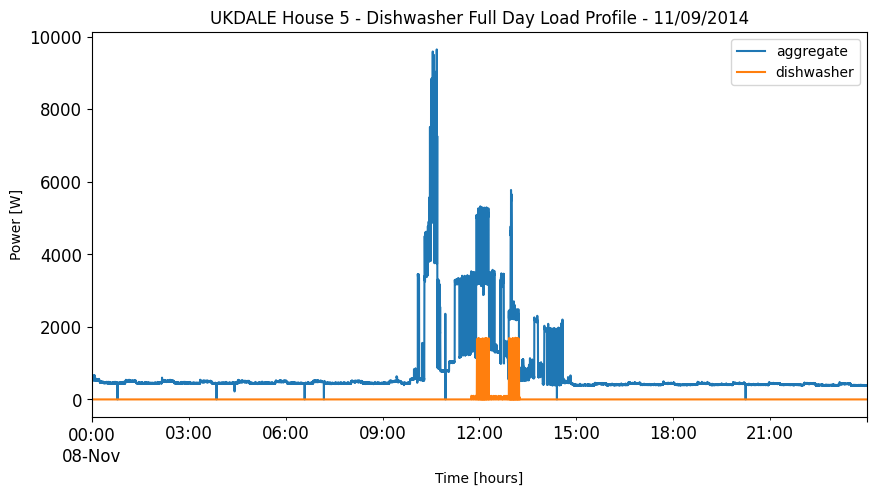

In [14]:
appliance_data.data[5].loc['2014-11-08 00:00:00':'2014-11-08 23:59:59'].plot(figsize=(10,5), xlabel= 'Time [hours]', ylabel=('Power [W]'), title=('UKDALE House 5 - Dishwasher Full Day Load Profile - 11/09/2014'), fontsize = 12)

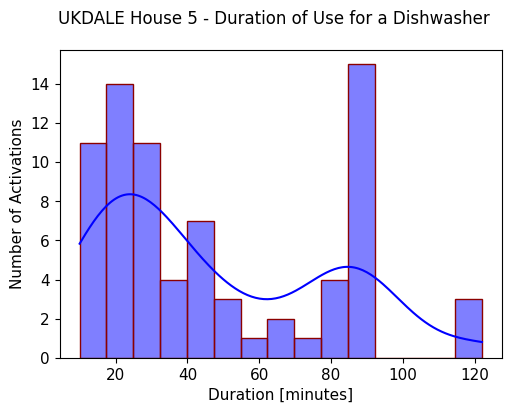

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5.71,4), sharey = True)

fig.suptitle('UKDALE House 5 - Duration of Use for a Dishwasher',fontsize = 12)

sns.histplot(dfdou, bins= 15, kde=True, color='blue', edgecolor = 'darkred', ax= ax)

ax.set_xlabel('Duration [minutes]',fontsize = 11)
ax.set_ylabel('Number of Activations',fontsize = 11)

plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

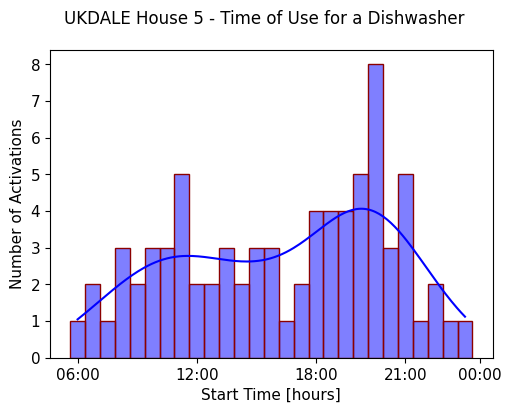

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5.71,4), sharey = True)

fig.suptitle('UKDALE House 5 - Time of Use for a Dishwasher',fontsize = 12)

sns.histplot(dftou, bins= 'auto', kde=True, color='blue', edgecolor = 'darkred', ax= ax)

plt.setp(ax, xticks=['00:00:00','06:00:00','12:00:00','18:00:00','21:00:00'], xticklabels = ['00:00','06:00','12:00','18:00','21:00'])
ax.set_xlabel('Start Time [hours]',fontsize = 11)
ax.set_ylabel('Number of Activations',fontsize = 11)

plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

In [17]:

h1 = appliance_data.activations[1].sort_values(by='duration_in_minutes', ascending = True)
h2 = appliance_data.activations[2].sort_values(by='duration_in_minutes', ascending = True)
h5 = appliance_data.activations[5].sort_values(by='duration_in_minutes', ascending = True)
 

In [18]:
frames = [h1, h2]

In [19]:
df = pd.concat(frames)

In [20]:
df.to_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\Duration and Time of use\UKDALE_washingmachine_activations.csv')